## Introduction 
In this project, Genetic algorithm is used in comnbination with random forest to predict concrete strength. 

Concrete is the most important material used in the construction industry. The compressive strengt of concrete is highly nonlinear and it's dependent on age and ingredients used in the concrete. These ingredients include cement, blast furnace slag, fly ash, water, superplasticizer, coarse aggregate, and fine aggregate.

As this is a Regression problem, Root mean square error will be used for evauluting the performance of the model. 

## Import Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sn

# Dataset

In [2]:
data = pd.read_csv(r'/Users/abdouliefatty/Desktop/Github_projects/concrete.csv')
data

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
...,...,...,...,...,...,...,...,...,...
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.30
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270,55.06


# Data Exploration

In [3]:
data.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [4]:
data.isna().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

<AxesSubplot:title={'center':'Histogram of Concrete Strength'}, xlabel='strength', ylabel='Count'>

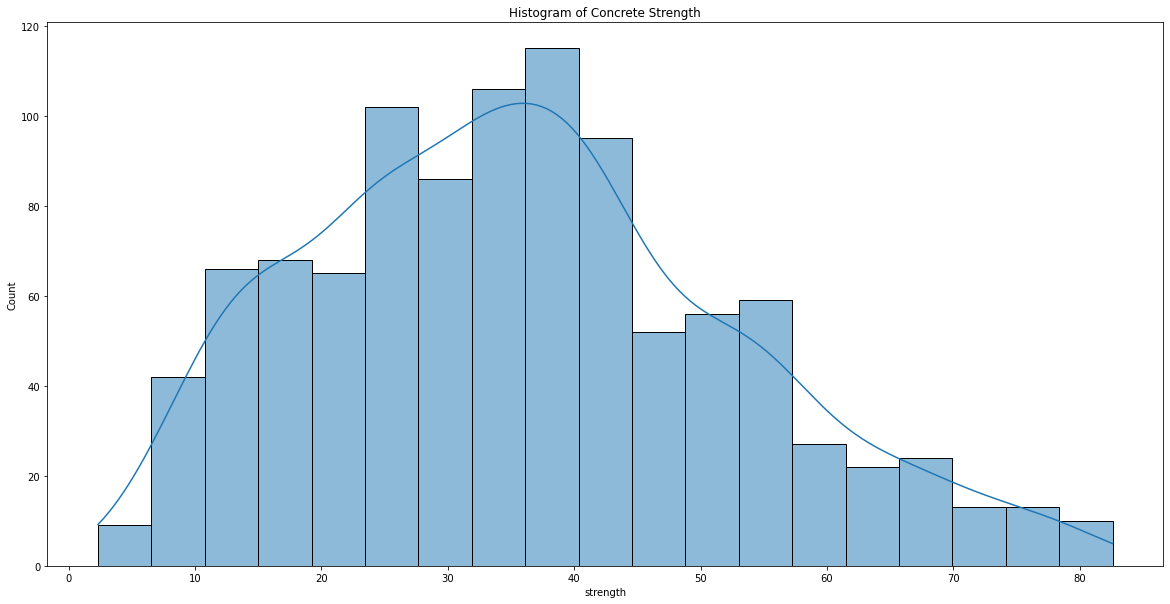

In [5]:
# distribution of concrete strength
plt.figure(figsize=(20,10))
plt.title('Histogram of Concrete Strength')
sn.histplot(data=data, x='strength', kde = True)

<AxesSubplot:title={'center':'Box plot'}>

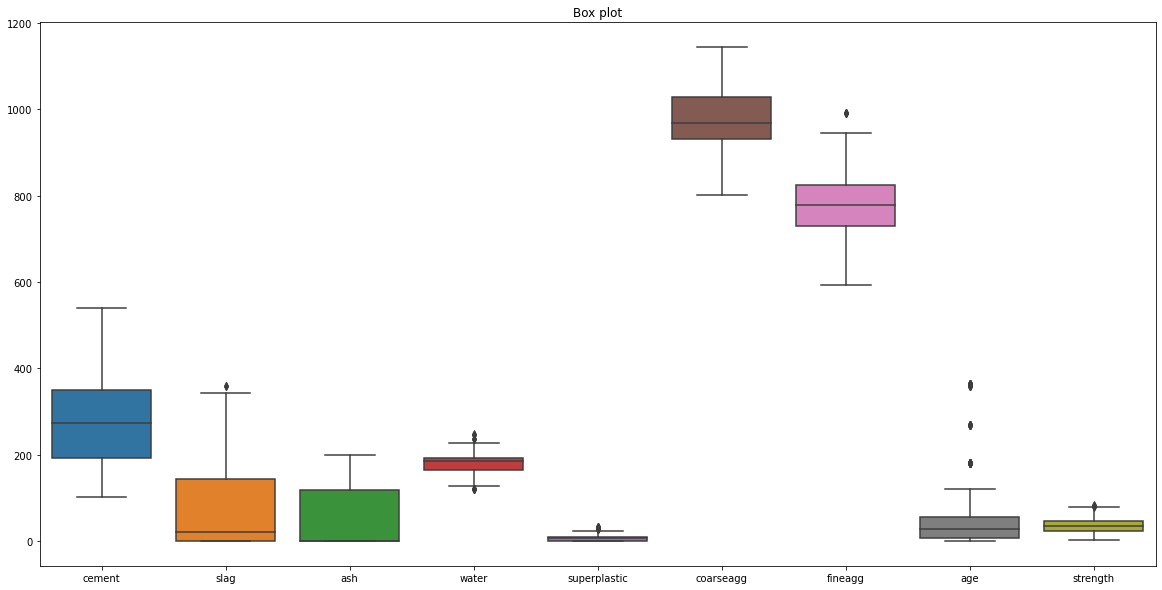

In [6]:
# box plot of our dataset to check for ouliers
plt.figure(figsize=(20,10))
plt.title('Box plot')
sn.boxplot(data=data)

#### Outlier removal using Box plot (IQR based)

<AxesSubplot:title={'center':'Box plot of cement'}, xlabel='cement'>

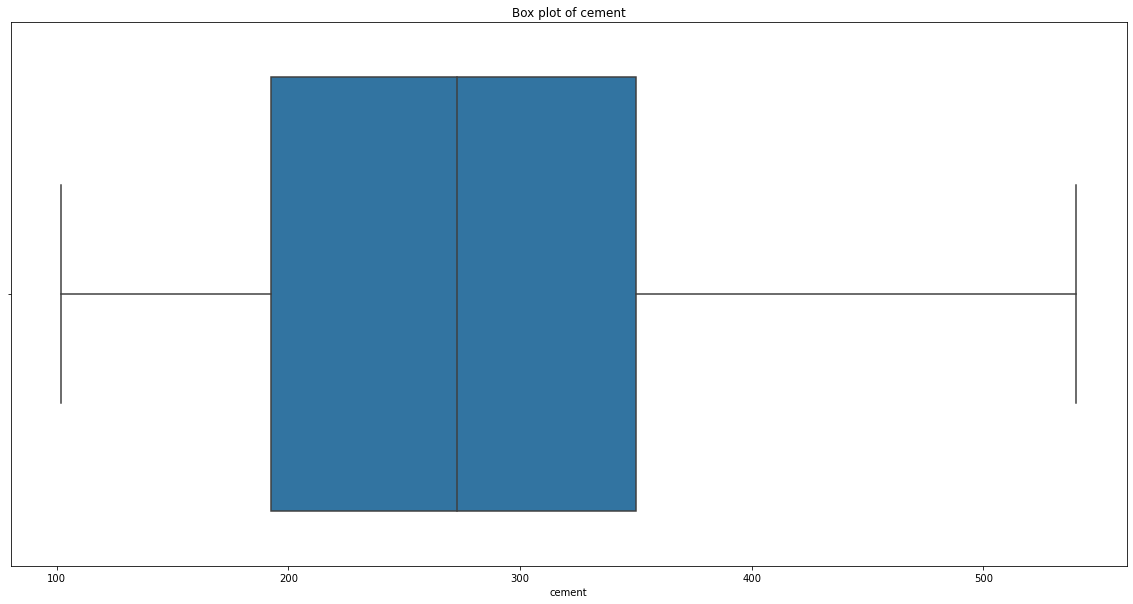

In [7]:
# Box plot of cement
plt.figure(figsize=(20,10))
plt.title('Box plot of cement')
sn.boxplot(data=data, x='cement')

<AxesSubplot:title={'center':'Box plot of slag'}, xlabel='slag'>

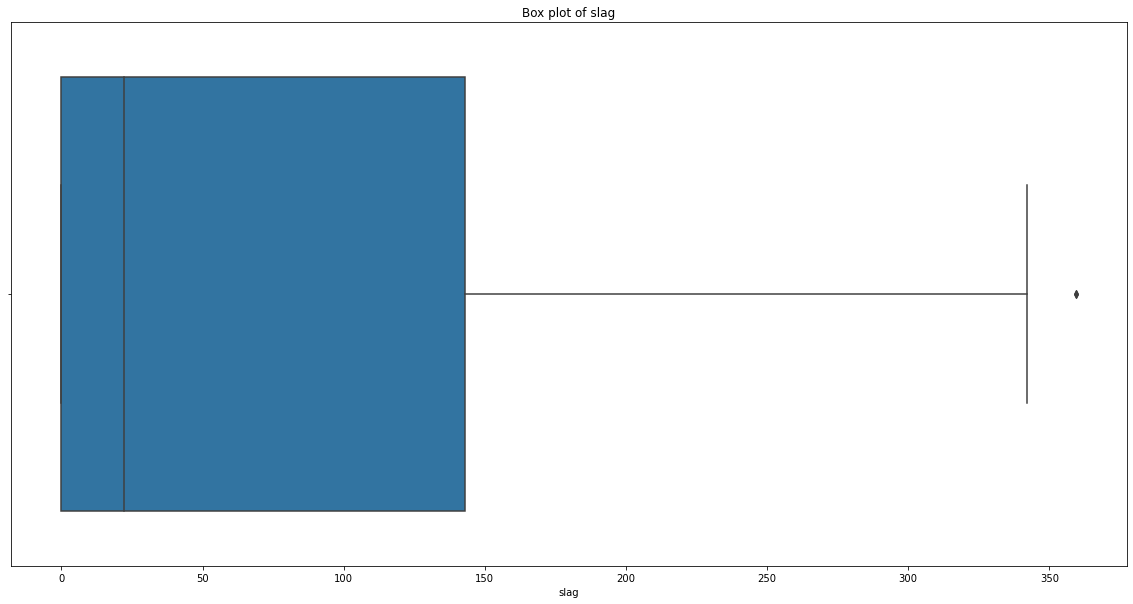

In [8]:
# Box plot of slag
plt.figure(figsize=(20,10))
plt.title('Box plot of slag')
sn.boxplot(data=data, x='slag')

In [9]:
# outliers for slag
data[data.slag>345]

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
918,239.6,359.4,0.0,185.7,0.0,941.6,664.3,28,39.44
990,239.6,359.4,0.0,185.7,0.0,941.6,664.3,7,25.42


In [10]:
# remove outliers for slag
data = data.drop(data[data['slag'] > 350].index)

<AxesSubplot:title={'center':'Box plot of ash'}, xlabel='ash'>

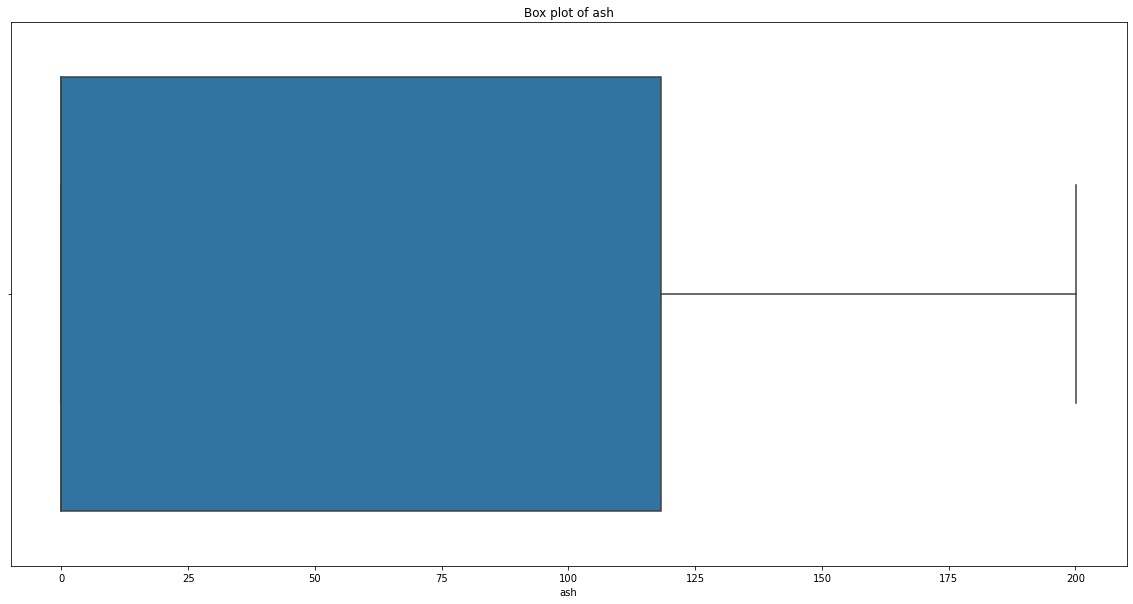

In [11]:
# Box plot of ash
plt.figure(figsize=(20,10))
plt.title('Box plot of ash')
sn.boxplot(data=data, x='ash')

<AxesSubplot:title={'center':'Box plot of water'}, xlabel='water'>

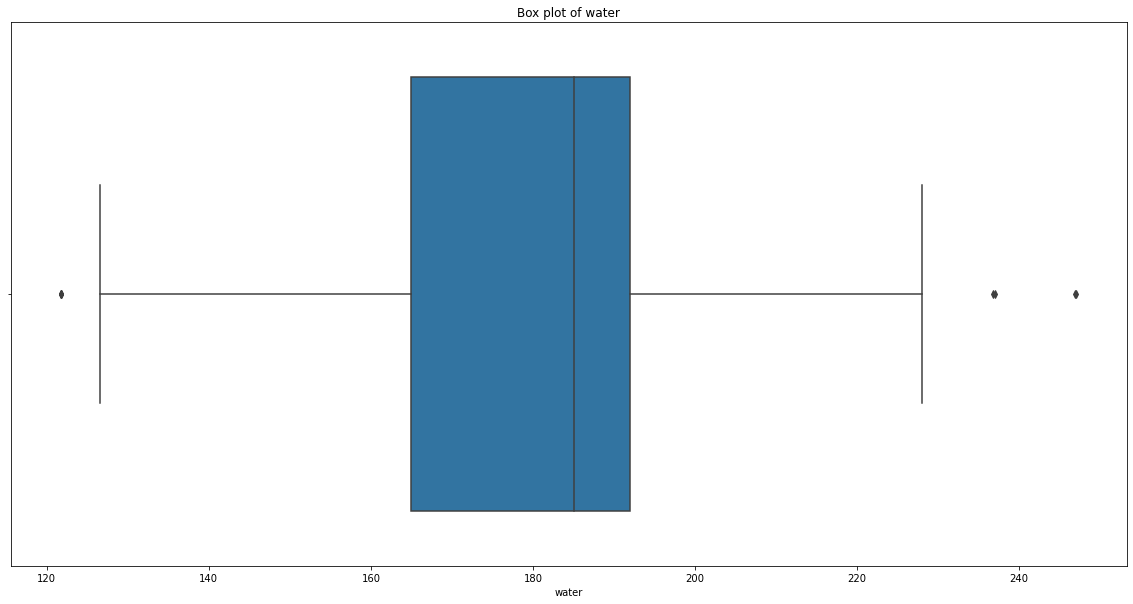

In [12]:
# Box plot of water
plt.figure(figsize=(20,10))
plt.title('Box plot of water')
sn.boxplot(data=data, x='water')

In [13]:
# outliers for water
data[(data.water<122) | (data.water>230)]

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
66,237.0,92.0,71.0,247.0,6.0,853.0,695.0,28,28.63
263,236.9,91.7,71.5,246.9,6.0,852.9,695.4,28,28.63
432,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,28,24.24
462,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,100,39.23
587,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,3,7.75
740,140.0,164.0,128.0,237.0,6.0,869.0,656.0,28,35.23
789,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,56,32.85
826,139.7,163.9,127.7,236.7,5.8,868.6,655.6,28,35.23
914,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,14,17.82


In [14]:
# remove outliers for water
data = data.drop(data[(data['water'] < 122) | (data['water'] > 230)].index)

<AxesSubplot:title={'center':'Box plot of superplastic'}, xlabel='superplastic'>

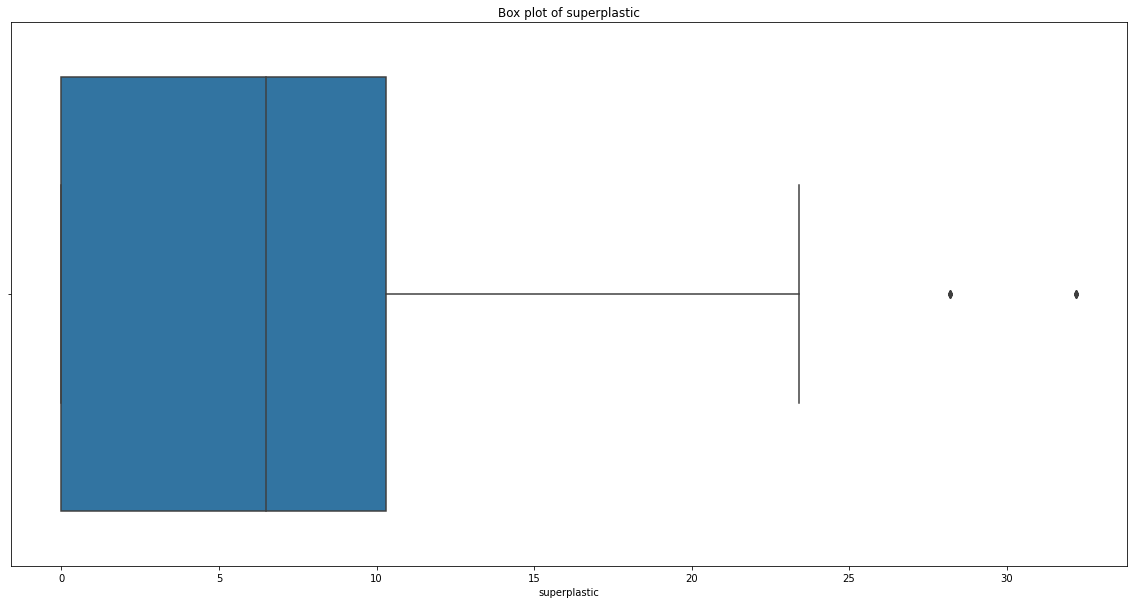

In [15]:
# Box plot of superplastic
plt.figure(figsize=(20,10))
plt.title('Box plot of superplastic')
sn.boxplot(data=data, x='superplastic')

In [16]:
# outliers for superplastic
data[data.superplastic>24]

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
44,531.3,0.0,0.0,141.8,28.2,852.1,893.7,91,59.2
156,531.3,0.0,0.0,141.8,28.2,852.1,893.7,28,56.4
232,469.0,117.2,0.0,137.8,32.2,852.1,840.5,56,69.3
292,469.0,117.2,0.0,137.8,32.2,852.1,840.5,91,70.7
538,531.3,0.0,0.0,141.8,28.2,852.1,893.7,7,46.9
744,469.0,117.2,0.0,137.8,32.2,852.1,840.5,7,54.9
816,469.0,117.2,0.0,137.8,32.2,852.1,840.5,28,66.9
838,531.3,0.0,0.0,141.8,28.2,852.1,893.7,56,58.8
955,469.0,117.2,0.0,137.8,32.2,852.1,840.5,3,40.2
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.3


In [17]:
# remove outliers for superplastic
data = data.drop(data[data['superplastic'] > 24].index)

<AxesSubplot:title={'center':'Box plot of coarseagg'}, xlabel='coarseagg'>

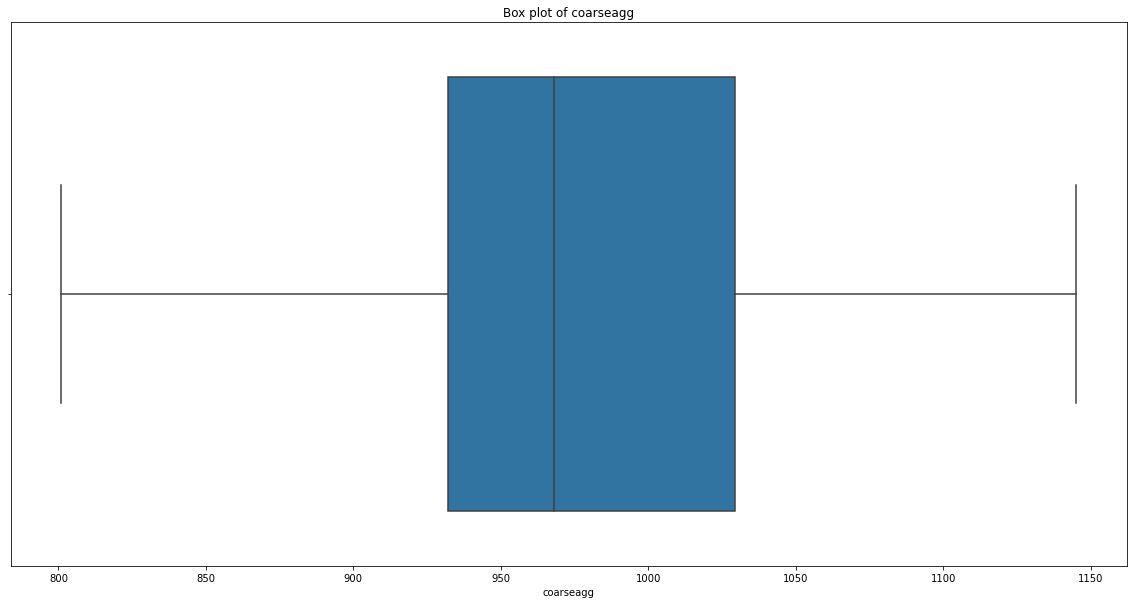

In [18]:
# Box plot of coarseagg
plt.figure(figsize=(20,10))
plt.title('Box plot of coarseagg')
sn.boxplot(data=data, x='coarseagg')

<AxesSubplot:title={'center':'Box plot of fineagg'}, xlabel='fineagg'>

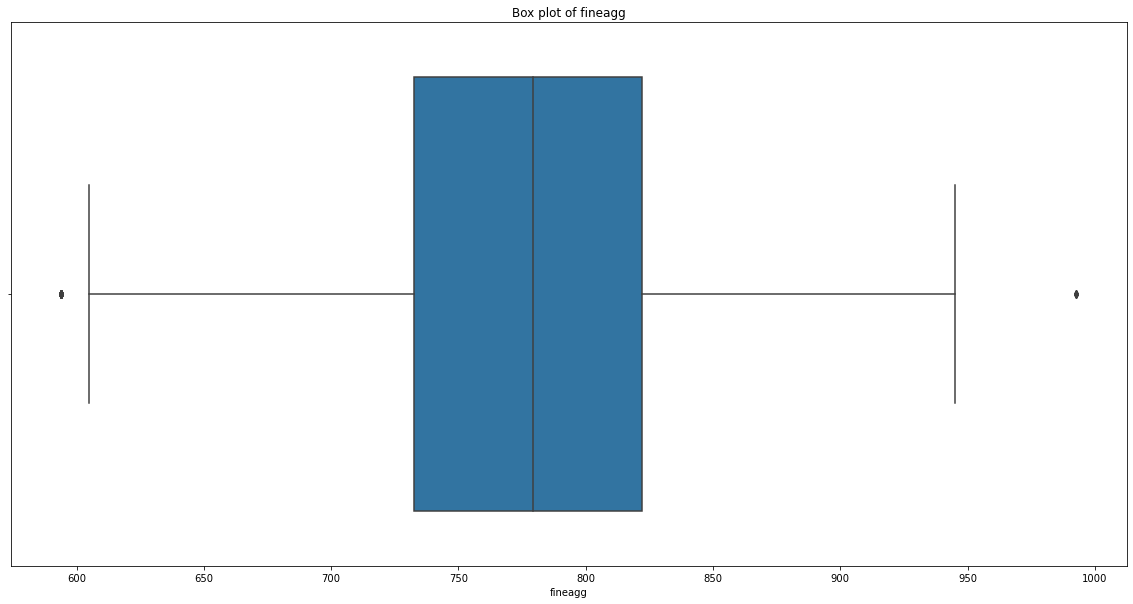

In [19]:
# Box plot of fineagg
plt.figure(figsize=(20,10))
plt.title('Box plot of fineagg')
sn.boxplot(data=data, x='fineagg')

In [20]:
# outliers for fineagg
data[(data['fineagg']<600) | (data['fineagg']>950)]

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
13,237.5,237.5,0.0,228.0,0.0,932.0,594.0,7,26.26
16,237.5,237.5,0.0,228.0,0.0,932.0,594.0,28,30.08
31,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.29
64,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
93,427.5,47.5,0.0,228.0,0.0,932.0,594.0,180,41.84
99,237.5,237.5,0.0,228.0,0.0,932.0,594.0,180,36.25
129,375.0,93.8,0.0,126.6,23.4,852.1,992.6,91,62.50
142,332.5,142.5,0.0,228.0,0.0,932.0,594.0,90,37.72
149,380.0,95.0,0.0,228.0,0.0,932.0,594.0,270,41.15
241,427.5,47.5,0.0,228.0,0.0,932.0,594.0,90,41.54


In [21]:
# remove outliers for fineagg
data = data.drop(data[(data['fineagg']<600) | (data['fineagg']>950)].index)

<AxesSubplot:title={'center':'Box plot of age'}, xlabel='age'>

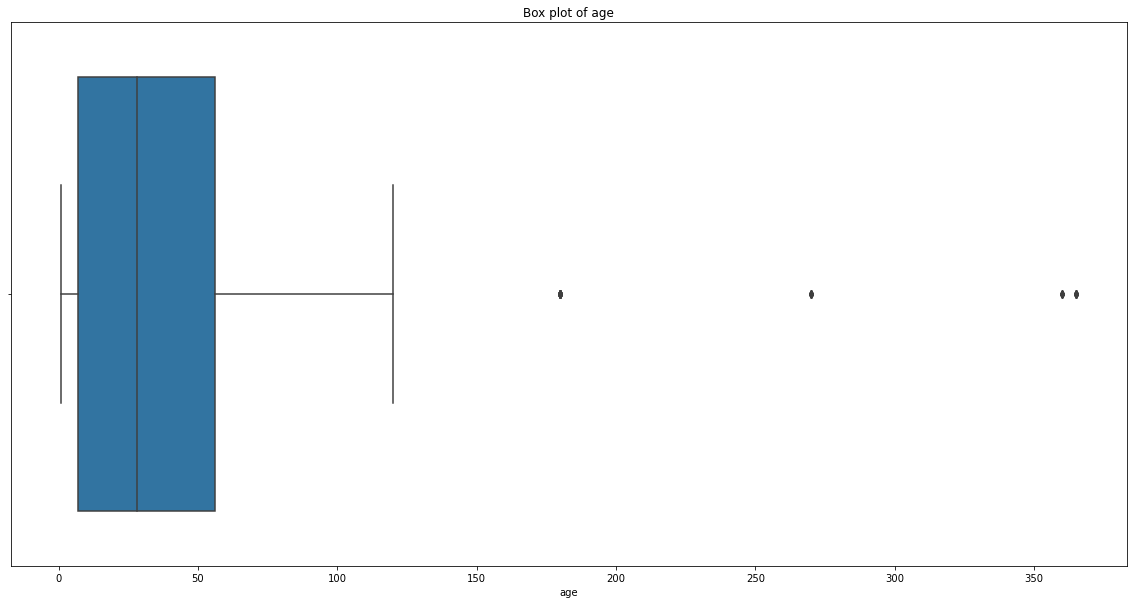

In [22]:
# Box plot of age
plt.figure(figsize=(20,10))
plt.title('Box plot of age')
sn.boxplot(data=data, x='age')

In [23]:
# outliers for age
data[data['age']>120]

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
51,331.0,0.0,0.0,192.0,0.0,978.0,825.0,180,39.00
103,380.0,0.0,0.0,228.0,0.0,932.0,670.0,180,53.10
133,236.0,0.0,0.0,193.0,0.0,968.0,885.0,365,25.08
144,302.0,0.0,0.0,203.0,0.0,974.0,817.0,180,26.74
152,322.0,0.0,0.0,203.0,0.0,974.0,800.0,180,29.59
157,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
159,304.0,76.0,0.0,228.0,0.0,932.0,670.0,365,55.26
198,266.0,114.0,0.0,228.0,0.0,932.0,670.0,365,52.91
199,277.0,0.0,0.0,191.0,0.0,968.0,856.0,180,32.33
207,190.0,190.0,0.0,228.0,0.0,932.0,670.0,180,46.93


In [24]:
# remove outliers for age
data = data.drop(data[data['age']>120].index)

<AxesSubplot:title={'center':'Box plot of strength'}, xlabel='strength'>

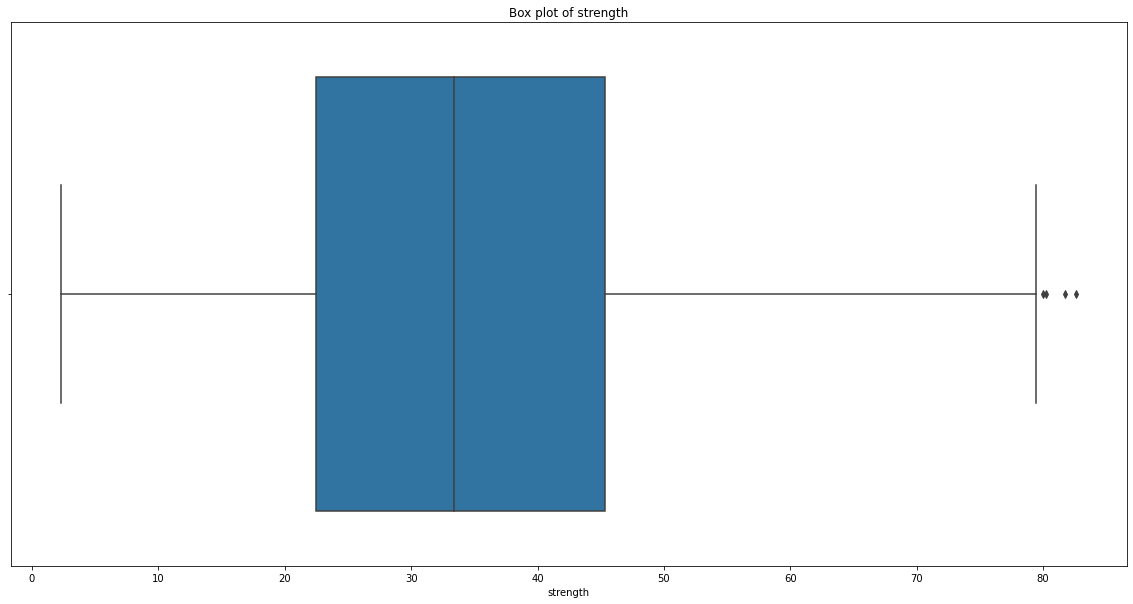

In [25]:
# Box plot of strength
plt.figure(figsize=(20,10))
plt.title('Box plot of strength')
sn.boxplot(data=data, x='strength')

In [26]:
# outliers for strength 
data[data['strength']>79]

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
192,315.0,137.0,0.0,145.0,5.9,1130.0,745.0,28,81.75
245,362.6,189.0,0.0,164.9,11.6,944.7,755.8,91,79.30
257,389.9,189.0,0.0,145.9,22.0,944.7,755.8,56,79.40
493,362.6,189.0,0.0,164.9,11.6,944.7,755.8,91,79.30
732,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
733,362.6,189.0,0.0,164.9,11.6,944.7,755.8,91,79.30
766,362.6,189.0,0.0,164.9,11.6,944.7,755.8,91,79.30
950,389.9,189.0,0.0,145.9,22.0,944.7,755.8,91,82.60
1003,323.7,282.8,0.0,183.8,10.3,942.7,659.9,56,80.20


In [27]:
# remove outliers for strength 
data = data.drop(data[data['strength']>79].index)

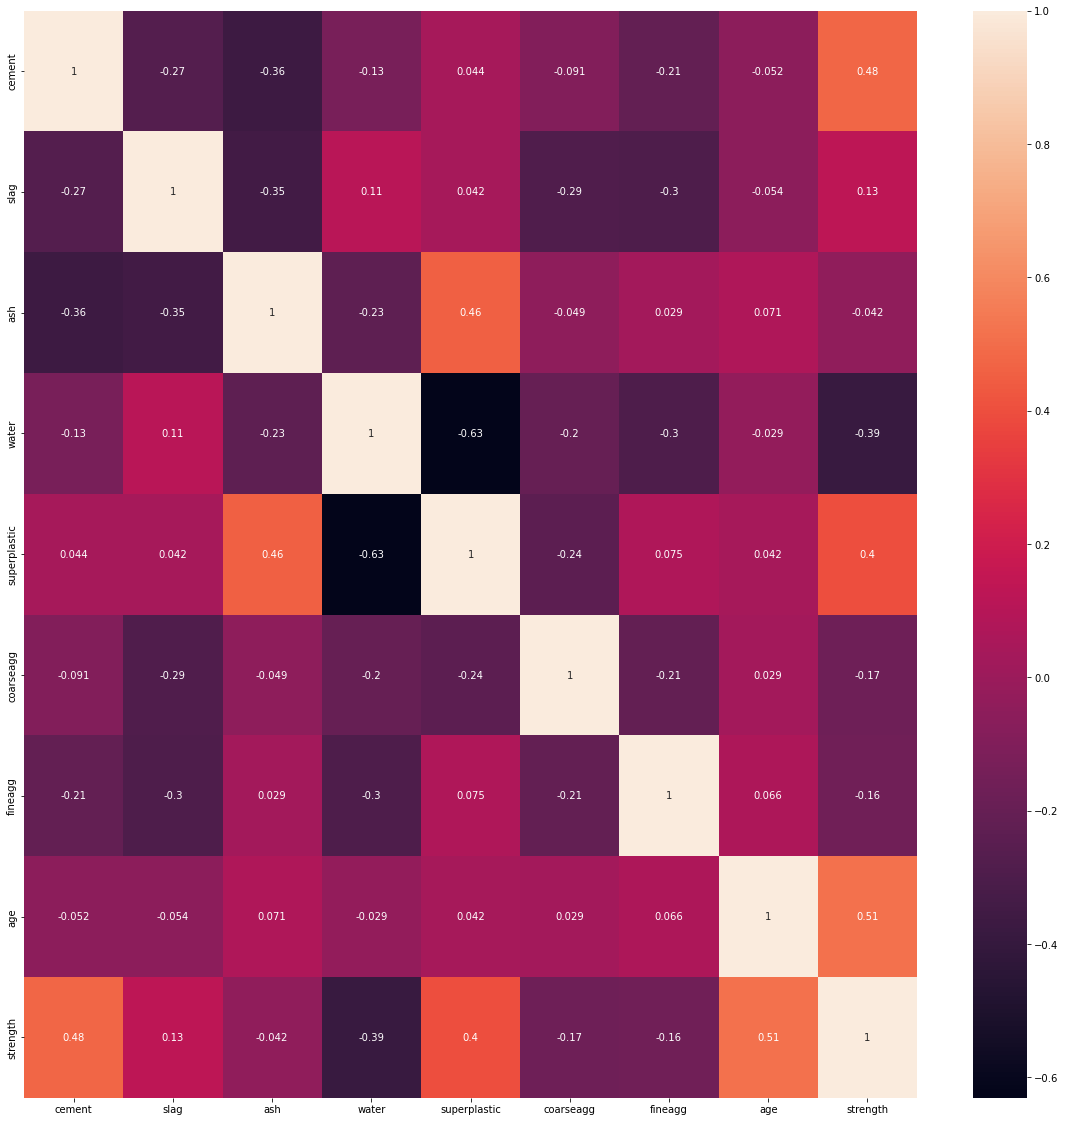

In [28]:
# heat map
plt.figure(figsize=(20,20))
sn.heatmap(data=data.corr(), annot=True);

In [29]:
# correlation between strength and the independent parameters
data.corr()['strength'].sort_values()[:-1]

water          -0.385794
coarseagg      -0.165909
fineagg        -0.161633
ash            -0.042227
slag            0.129455
superplastic    0.398849
cement          0.476464
age             0.509746
Name: strength, dtype: float64

# Modelling

In [30]:
X = data.drop(['strength'], axis='columns')
X

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28
...,...,...,...,...,...,...,...,...
1023,141.3,212.0,0.0,203.5,0.0,971.8,748.5,7
1024,297.2,0.0,117.5,174.8,9.5,1022.8,753.5,3
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28


In [31]:
y = data.iloc[:,-1]
y

0       29.89
1       23.51
2       29.22
3       45.85
4       18.29
        ...  
1023    10.39
1024    21.91
1025    13.29
1027    44.28
1029    52.61
Name: strength, Length: 921, dtype: float64

In [32]:
# Train_Test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [34]:
# Import Models 
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import KFold

In [35]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
params_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(params_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [36]:
# hyperameter tunining using evolutionary search 
from evolutionary_search import EvolutionaryAlgorithmSearchCV
cv = EvolutionaryAlgorithmSearchCV(estimator=RandomForestRegressor(),
                                   params=params_grid,
                                   cv=10,
                                   verbose=1,
                                   population_size=50,
                                   gene_mutation_prob=0.10,
                                   gene_crossover_prob=0.5,  
                                   tournament_size=3,
                                   generations_number=10,
                                   n_jobs=1)
cv.fit(X_train, y_train)

Types [1, 1, 1, 1, 1, 1] and maxint [9, 1, 11, 2, 2, 1] detected
--- Evolve in 4320 possible combinations ---
gen	nevals	avg     	min     	max     	std      
0  	50    	0.852329	0.792212	0.893512	0.0292828
1  	32    	0.876305	0.807403	0.8936  	0.0209936
2  	29    	0.888797	0.807358	0.8936  	0.012584 
3  	26    	0.893298	0.889211	0.893724	0.000705942
4  	36    	0.891782	0.821208	0.893724	0.0103421  
5  	39    	0.889906	0.821202	0.893724	0.0145438  
6  	27    	0.893294	0.87726 	0.894125	0.00229222 
7  	31    	0.893241	0.877173	0.894125	0.00249987 
8  	29    	0.893068	0.870807	0.894125	0.00396121 
9  	33    	0.893574	0.876227	0.894125	0.00258475 
10 	27    	0.894089	0.893034	0.894373	0.000205294
Best individual is: {'n_estimators': 600, 'max_features': 'auto', 'max_depth': 30, 'min_samples_split': 2, 'min_samples_leaf': 1, 'bootstrap': True}
with fitness: 0.8943727869007366


In [37]:
cv.best_params_

{'n_estimators': 600,
 'max_features': 'auto',
 'max_depth': 30,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'bootstrap': True}

## Model Evalution

In [38]:
# r2 and rsme for performance evaluation 
from sklearn.metrics import mean_squared_error, r2_score

In [39]:
cv.best_score_

0.8943727869007366

In [40]:
y_preds = cv.predict(X_test)

In [41]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_preds)
mse = mean_squared_error(y_test,y_preds)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_preds)

In [42]:
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R2 Score: {r2}')

MAE: 4.300679717096962
MSE: 31.726031914274564
RMSE: 5.632586609567097
R2 Score: 0.8853086227939293
